#用字典学习分解法分类

在这个主题中，我们将介绍一种可以用于分类的分解方法——字典学习（Dictionary Learning），将数据集转换成一个稀疏的形式。

<!-- TEASER_END -->

##Getting ready

`DictionaryLearning`方法的思想是把特征看作构成数据集的基础。首先我们导入`iris`数据集：

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_data = iris.data
iris_target = iris.target

##How to do it...

首先，导入`DictionaryLearning`：

In [3]:
from sklearn.decomposition import DictionaryLearning

然后用三个成分表示`iris`数据集中花的类型：

In [4]:
dl = DictionaryLearning(3)

再用`fit_transform`转换其他数据，这样我们就可以对比训练前后的数据了：

In [5]:
transformed = dl.fit_transform(iris_data[::2])
transformed[:5]

array([[ 0.        ,  6.34476574,  0.        ],
       [ 0.        ,  5.83576461,  0.        ],
       [ 0.        ,  6.32038375,  0.        ],
       [ 0.        ,  5.89318572,  0.        ],
       [ 0.        ,  5.45222715,  0.        ]])

我们可以可视化这个结果。注意，每个成分的值分别平行$x$，$y$和$z$三个轴，其他坐标都是0；这就是稀疏性。

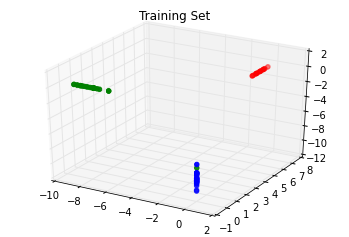

In [6]:
from mpl_toolkits.mplot3d import Axes3D
colors = np.array(list('rgb'))
f = plt.figure()
ax = f.add_subplot(111, projection='3d')
ax.set_title("Training Set")
ax.scatter(transformed[:, 0], transformed[:, 1], transformed[:, 2], color=colors[iris.target[::2]]);

如果你细心看，还是会发现一些误差。有一个样本分错了类型，虽然一个错误并不是很严重。

下面，让我们用`fit`而不用`fit_transform`来训练数据集：

In [7]:
transformed = dl.transform(iris_data[1::2])

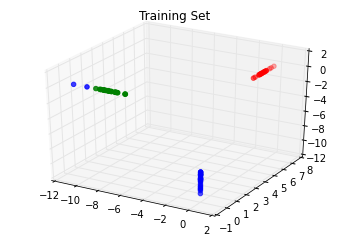

In [8]:
colors = np.array(list('rgb'))
f = plt.figure()
ax = f.add_subplot(111, projection='3d')
ax.set_title("Training Set")
ax.scatter(transformed[:, 0], transformed[:, 1], transformed[:, 2], color=colors[iris.target[1::2]]);

还是有一些分类错误的样本。如果你看看之前降维主题中的图，会发现绿色和蓝色两类数据有交叉部分。

##How it works...

`DictionaryLearning`具有信号处理和神经学领域的背景知识。其理念是某一时刻只有少数特征可以实现。因此，`DictionaryLearning`在假设大多数特征都是0的情况下，尝试发现一个适当的数据表现形式。